<a href="https://colab.research.google.com/github/LucasWerppFranco/CP-1---Energias-Renovaveis/blob/ex-6-10/Exercicios%206-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercicio 6-10


Bibliotecas


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/individual+household+electric+power+consumption.zip", sep=";")

/tmp/ipython-input-120658122.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/individual+household+electric+power+consumption.zip", sep=";")


informações


In [13]:
df.head(11)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


# Exercicio 6
Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua
escolha

In [38]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df.dropna(subset=['Global_active_power'], inplace=True)

df['Global_active_power'] = df['Global_active_power'].astype(int)



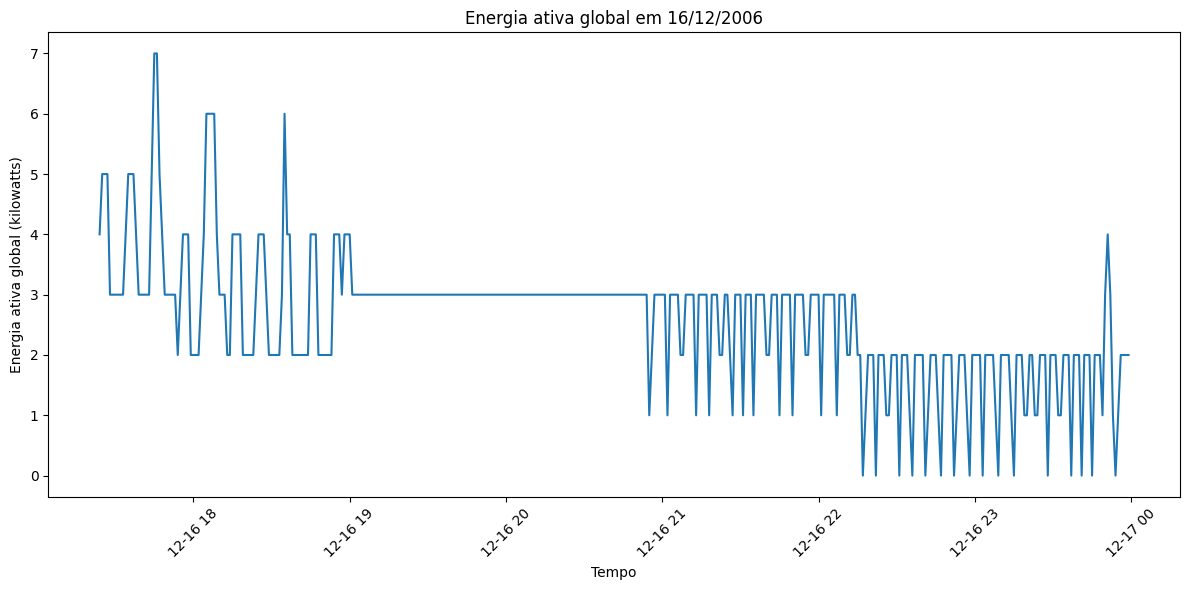

In [45]:
date_to_plot = df['Date'].iloc[0]

df_single_day = df[df['Date'] == date_to_plot].copy()

df_single_day['datetime'] = pd.to_datetime(df_single_day['Date'].astype(str) + ' ' + df_single_day['Time'], format='%Y-%m-%d %H:%M:%S')


df_single_day.set_index('datetime', inplace=True)

df_single_day['Global_active_power'] = pd.to_numeric(df_single_day['Global_active_power'], errors='coerce')
df_single_day.dropna(subset=['Global_active_power'], inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_single_day.index, y='Global_active_power', data=df_single_day)
plt.title(f'Energia ativa global em {date_to_plot.strftime("%d/%m/%Y")}')
plt.xlabel('Tempo')
plt.ylabel('Energia ativa global (kilowatts)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exercicio 7
Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?


In [36]:
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

df.dropna(subset=['Voltage'], inplace=True)

df['Voltage'] = df['Voltage'].astype(int)



<Axes: >

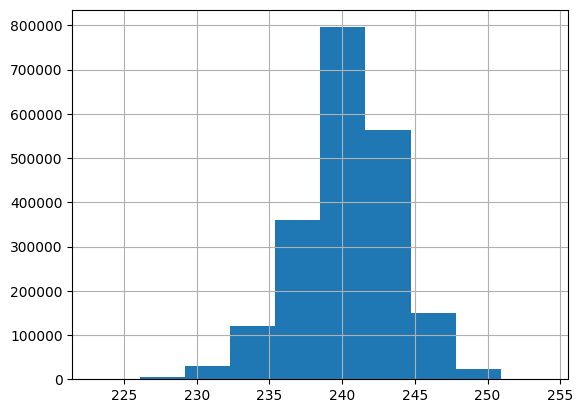

In [37]:
df["Voltage"].hist()

# Exercicio 8
 Calcule o consumo médio por mês em todo o período disponível no dataset.

In [19]:
media=df[].mean()
print(f"O consumo medio por mes é de {media:.2f} ")

SyntaxError: invalid syntax (ipython-input-4128919493.py, line 1)

# Exercicio 9
 Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [28]:
consumo_diario = df.groupby('Date')['Global_active_power'].sum()

dia_maior_consumo = consumo_diario.idxmax()
valor_maior_consumo = consumo_diario.max()

print(f"O dia com maior consumo de energia ativa global é {dia_maior_consumo} com um total de {valor_maior_consumo} kW.")

O dia com maior consumo de energia ativa global é 2006-12-23 00:00:00 com um total de 4037 kW.


# Exercicio 10
Compare o consumo médio de energia ativa global em dias de semana versus finais de
semana.

In [27]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Day_of_week'] = df['Date'].dt.dayofweek

df['Day_type'] = df['Day_of_week'].apply(lambda x: 'dias da semana' if x < 5 else 'finais de semana')

average_consumption_by_day_type = df.groupby('Day_type')['Global_active_power'].mean()

print("Consumo médio de energia ativa global:")
print(average_consumption_by_day_type)

Consumo médio de energia ativa global:
Day_type
dias da semana      0.629897
finais de semana    0.806726
Name: Global_active_power, dtype: float64
